# matplotlib学习之基本使用 

本节代码来自: **黄海广-机器学习** https://github.com/fengdu78/WZU-machine-learning-course 推荐自学

要用Jupyter notebook进行可交互式的绘图，需要执行下面的语句，这样就可以直接在Notebook里绘图了。

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

重要参考资料-A Brief matplotlib API Primer（一个简单的matplotlib API入门） 

这个内容来自《利用python进行数据分析第二版》，主要内容：

- 1 Figures and Subplots（图和子图）
- 2 Colors, Markers, and Line Styles（颜色，标记物，线样式）
- 3 Ticks, Labels, and Legends（标记，标签，图例）
- 4 Saving Plots to File（把图保存为文件）
- 5 matplotlib Configuration（matplotlib设置）

seaborn和pandas内建的一些绘图函数能帮我们省去很多画图的繁杂工作，但如果我们想要定制化地做出一些函数无法绘出的图，就需要了解一些matplotlib的API了。

# 1 Figures and Subplots（图和子图）

在matplotlib中画的图，都是在Figure对象中的。可以用plt.figure创建一个：

In [2]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

如果实在ipython里执行，可以看到一个空白的绘图窗口出现，但是在jupyter中没有任何显示，除非我们输入一些命令。

plt.figure有一些选择，其中figsize保证figure有固定的大小和长宽比，这样也方便保存到磁盘中。

我们不能在一个空白的figure上绘图，必须要创建一个或更多的subplots（子图），用add_subplot:

有一个注意点，在使用Jupyter notebook的时候，绘图可能在一个cell之后被重置，所以对于一些复杂的绘图，必须把绘图命令全部放在一个notebook cell中。

这里我们在一个cell中执行这些命令：

这行代码的意思是，figure是2x2（这样一共有4幅图），而且我们选中4个subplots（数字从1到4）中的第1个。如果要创建另外两个子图，可以输入：

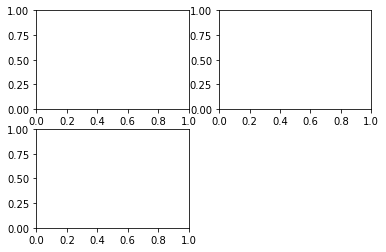

In [3]:
fig = plt.figure() 
ax1 = fig.add_subplot(2, 2, 1) 
ax2 = fig.add_subplot(2, 2, 2) 
ax3 = fig.add_subplot(2, 2, 3)
# 下面出现交互式界面后，不要关闭，运行之后的命令，可以看到最后一副图中出现了线

在这里，fig_add_subplot返回的是一个AxesSubplot对象，我们可以直接在空白的subplot上绘图，直接在对应的AxesSubplot对象上调用方法即可：

In [4]:
ax1.hist(np.random.randn(100), bins=20, color='g', alpha=0.3)

(array([ 1.,  0.,  0.,  2.,  2.,  2.,  4.,  4.,  6.,  2.,  8., 13., 12.,
        10., 10., 11.,  6.,  5.,  1.,  1.]),
 array([-3.46615602, -3.18934387, -2.91253172, -2.63571956, -2.35890741,
        -2.08209526, -1.80528311, -1.52847096, -1.25165881, -0.97484666,
        -0.69803451, -0.42122236, -0.14441021,  0.13240194,  0.40921409,
         0.68602624,  0.96283839,  1.23965054,  1.51646269,  1.79327484,
         2.07008699]),
 <BarContainer object of 20 artists>)

In [5]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

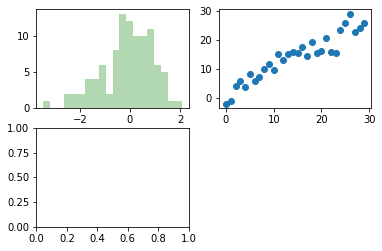

In [6]:
fig

'k--'是一个style（样式）选项，它表示使用黑色的虚线。

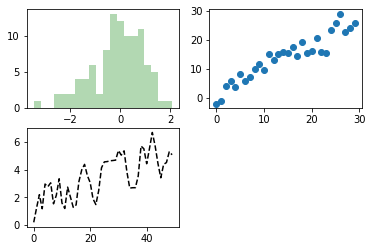

In [7]:
ax3.plot(np.random.randn(50).cumsum(), 'k--')
fig

因为创建一个带有多个subplot的figure是很常见的操作，所以matplotlib添加了一个方法，plt.subplots，来简化这个过程。这个方法会创建一个新的figure，并返回一个numpy数组，其中包含创建的subplot对象：

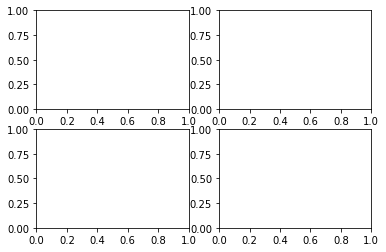

In [8]:
f, axes = plt.subplots(2, 2)

In [9]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

这个操作是很有用的。axes能用一个二位数据来索引，例如，axes[0, 1]。我们可以使用sharex和sharey来指定不同subplot有相同的x-或y-axis（其实就是令坐标轴的范围相同），这能让我们在同一范围内进行数据之间的比较。不然的话，matplotlib会自动绘图的范围不一定是一样的。

 **Adjusting the spacing around subplots（调整subplot直接的间隔）**

默认情况下，matplotlib会在subplot之间留下一定间隔的边距，这取决于绘图的高度和跨度。所以如果我们调整绘图的大小，它会自动调整。我们可以用Figure对象下的subplots_adjust方法来更改间隔，当然，也可以用第一层级的函数：

    subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
    
wspace和hspace控制figure宽度和长度的百分比，可以用来控制subplot之间的间隔。这里有一个例子，我们让间隔为0：

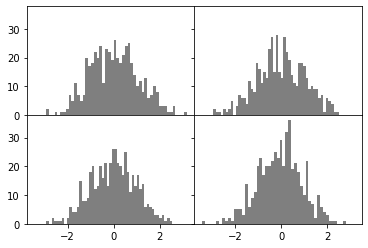

In [10]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)  

我们注意到轴上有些标签重叠了。matplotlib不会检查标签是否重叠，所以我们需要直接规定明确的tick location（记号位置）和tick labels（记号标签），这部分会在之后介绍。

# 2 Colors, Markers, and Line Styles（颜色，标记物，线样式）

matplotlib的plot主函数能接受x和y坐标，在可选项中，字符串能指定颜色和线样式。

例如，画出x和y，用绿色的点线：

简写: `ax.plot(x, y, 'g--')` 

传参: `ax.plot(x, y, linestyle='--', color='g')` 

用markers（标记物）来高亮实际的数据点。


<!-- **Line Styles**

=============    ===============================
character        description
=============    ===============================
``'-'``          solid line style
``'--'``         dashed line style
``'-.'``         dash-dot line style
``':'``          dotted line style
=============    =============================== 

**Colors**

The supported color abbreviations are the single letter codes

=============    ===============================
character        color
=============    ===============================
``'b'``          blue
``'g'``          green
``'r'``          red
``'c'``          cyan
``'m'``          magenta
``'y'``          yellow
``'k'``          black
``'w'``          white
=============    ===============================  


**Markers**

=============   ===============================
character       description
=============   ===============================
``'.'``         point marker
``','``         pixel marker
``'o'``         circle marker
...
=============   =============================== -->

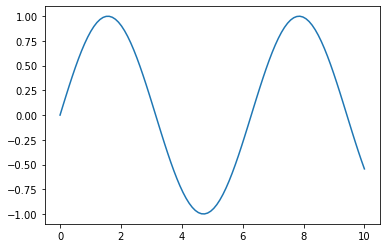

In [11]:
plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 100)
ax.plot(x, np.sin(x))
plt.show()

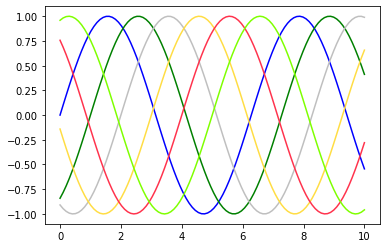

In [12]:
# 颜色调整
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse')  # all HTML color names supporte
plt.show()

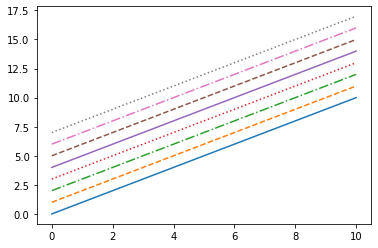

In [13]:
# 线条样式
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':')  # dotted
plt.show()

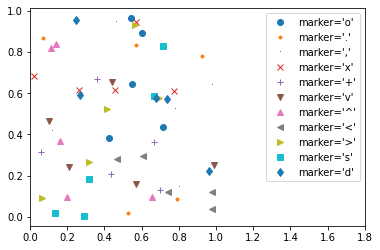

In [14]:
# 标记展示
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8)
plt.show()

<!-- 当运行上面命令时，我们注意到，输出有`<matplotlib.legend.Legend at 0x10906fda0>`这样的字样。这是matplotlib返回我们添加的那些子图的索引。大部分时候我们可以无视这种输出。这里，我们把label传递给了plot，这样通过plt.legend显示出每条线的意义。

注意：我们必须调用plt.legend（或ax.legend，如果有axes的话）来创建一个legend（图例），不论是非传入label。（译者：经测试，如果不调用plt.legend的话，是看不到label的） -->

# 3 Ticks, Labels, and Legends（标记，标签，图例）

pyplot界面是为交互式使用而设计的，它包含很多方法，比如xlim, xticks, xticklabels。这些方法控制绘图的范围，标记位置，标记标签。有两种使用方法：

- 调用的时候不传入参数，使用当前的参数设置（例如，plt.xlim()返回当前X轴的范围）
- 调用的时候传入参数，使用传入的参数设置（例如，plt.xlim([0, 10]), 令X轴的范围从0到10）

所有这些方法，作用于激活的或最新创建的AxesSubplot对象上。每一个都在subplot有对应的两个方法；比如对于xlim，就有对应的ax.get_xlim和ax.set_xlim。这里作者使用subplot的方法，这样会更清晰。

### Setting the title, axis labels, ticks, and ticklabels（设定标题，轴标签，标记，标记标签）

这里创建一个简单的图，画一个随机漫步：

In [15]:
fig = plt.figure() # 直到下一个黑体标题出现前，不要关闭这个fig

<Figure size 432x288 with 0 Axes>

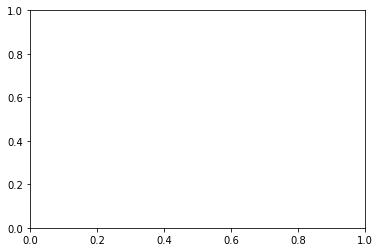

In [16]:
ax = fig.add_subplot(1, 1, 1)
fig

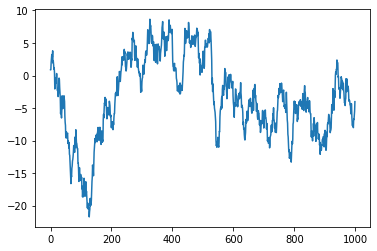

In [17]:
ax.plot(np.random.randn(1000).cumsum())
fig

为了改变x-axis tick（x轴标记），使用set_xticks和set_xticklabels。前者告诉matplotlib沿着x轴的范围，把标记放在哪里；默认会把所在位置作为标签，但我们可以用set_xticklabels来设置任意值作为标签：

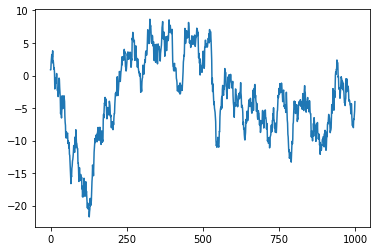

In [18]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
fig

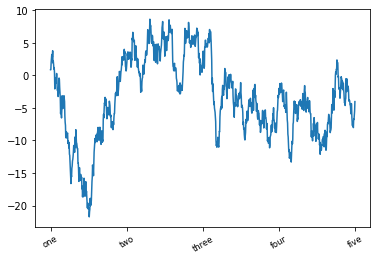

In [19]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
fig

rotation选项让x轴上的标记标签有一个30度的旋转。set_xlabel给x轴一个名字，而set_title给subplot一个标题：

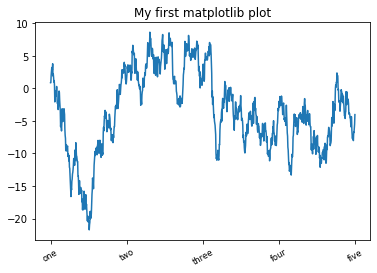

In [20]:
ax.set_title('My first matplotlib plot')
fig

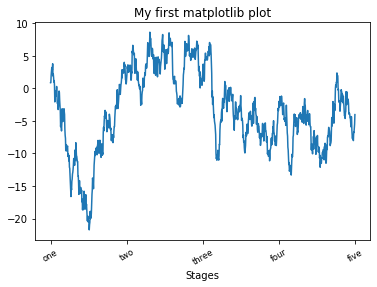

In [21]:
ax.set_xlabel('Stages')
fig

用相同的流程来更改y轴，把上面代码里的x变为y。axes类有一个set方法，能让我们一次设置很多绘图特性。对于上面的例子，我们可以写成下面这样：

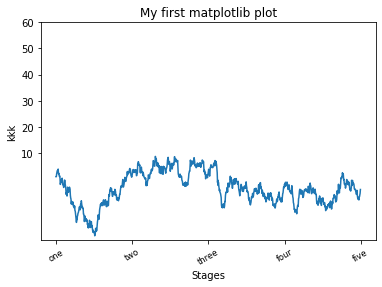

In [22]:
props = {
    'yticks': [10,20,30,40,50,60],
    'ylabel': 'kkk'
}

ax.set(**props)
fig

### Adding legends （添加图例）

图例对于绘图很重要。有很多方式可以添加图例。最简单的方法是用label参数：

In [23]:
from numpy.random import randn

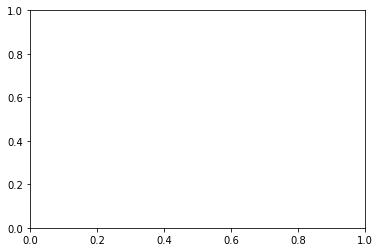

In [24]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

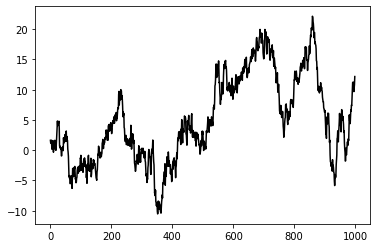

In [25]:
ax.plot(randn(1000).cumsum(), 'k', label='one')
fig

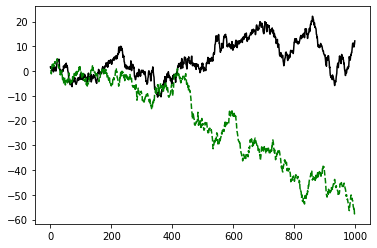

In [26]:
ax.plot(randn(1000).cumsum(), 'g--', label='two')
fig

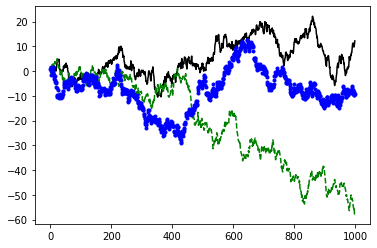

In [27]:
ax.plot(randn(1000).cumsum(), 'b.', label='three')
fig

做完了上面的部分，调用ax.legend()或plt.legend()，来自动创建图例：

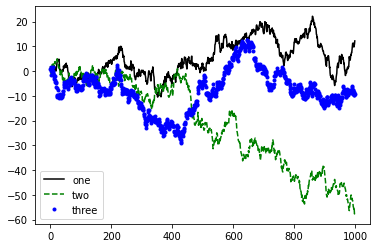

In [28]:
ax.legend(loc='best')
fig

legend方法有一些选项，比如用loc参数设定位置。更多信息，可以参考字符串文档（ax.legend?）

loc告诉matplotlib把图例放在哪里。如果不挑剔的话，直接设定'best'就可以了，它会自动选择一个合适的位置。如果想要从图例中排除一个或更多的元素，那就不要传入label，或设置`label='_nolegen_'`。


# 4 Saving Plots to File（把图保存为文件）

我们可以用plt.savefig来保存图。这个方法等同于直接在figure对象上调用savefig方法。例如，想要保存一个SVG版本的图片，键入：

    `plt.savefig('figpath.svg)`

保存的文件类型通过文件名后缀来指定。即如果使用 .pdf做为后缀，就会得到一个PDF文件。



# 5 matplotlib Configuration（matplotlib设置）

matplotlib很多默认的设置是可以自己定义的，通过修改一些全局设定，比如图大小，subplot间隔，颜色，字体大小，网格样式等等。一种更累设定的方式是用rc方法，例如，想要设置全局的图大小为10 x 10，键入：

    plt.rc('figure', figsize=(10, 10))
    
rc中的第一个参数是我们想要自定义的组件，比如'figure', 'axes', 'xtick', 'ytick', 'grid', 'legend'，或其他。然后添加一个关键字来设定新的参数。一个比较方便的写法是把所有的设定写成一个dict：

    font_options = {'family': 'monospace',
                    'weight': 'bold',
                    'size'  : 'small'}
    plt.rc('font', **font_options)
    
更详细的设定可以去看一下文档，matplotlib影城而设置文件*matplotlibrc*，位于*matplotlib/mlp-data*文件夹下。如果按自己的方式修改这个文件，并把这个文件放在主目录下，更名为*.matplotlibrc*的话，在每次启动matplotlib的时候，会自动加载这个文件。